#Drug Classification Task
Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.
After establish a conncetion with our drive folder we can move on to reach the data.

## Import Dataset

Since we've decided to solve a Kaggle task of classification of type of drugs, we can start importing directly on colab our material. \\
1) Identify my account of kaggle. \\
2) Set the directory of work. \\
3) Specify which dataset we would use. \\
4) Once updated the zip file of data, we can unzip it.

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import os
uploaded = files.upload()#here we should update our kaggle.json (API token)

Saving kaggle.json to kaggle (4).json


In [ ]:
!pwd
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

/content


In [ ]:
!kaggle datasets download -d prathamtripathi/drug-classification

drug-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls #copy the name of the zip file
from zipfile import ZipFile
with ZipFile('drug-classification.zip', 'r') as zipObj:
   zipObj.extractall()

 drug200.csv		  'kaggle (1).json'  'kaggle (3).json'	 kaggle.json
 drug-classification.zip  'kaggle (2).json'  'kaggle (4).json'	 sample_data


In [ ]:
import pandas as pd
data=pd.read_csv("drug200.csv")

## Exporatory Data Analysis


BEfore to run hardly our Multilayer Neural Network, we want to provide some ideas about how the data avaliable can be exploited to classify the output.
In fact, as you can see, from the following plots some variables allow us to classify well just combining the results.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


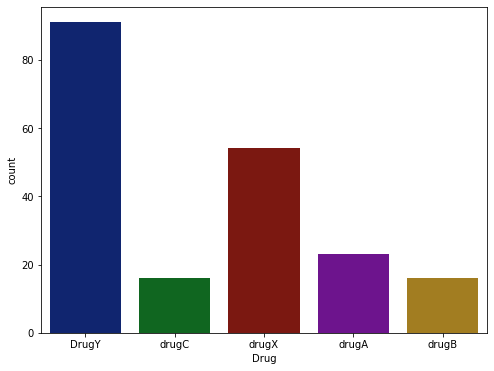

In [ ]:
import seaborn as sns
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(8,6))
dcount = sns.countplot('Drug', data=data)

In these case for exaple, some drugrs like "Drug A" and "Drug B" are generally consumed just by a certain  type of users (young and old).

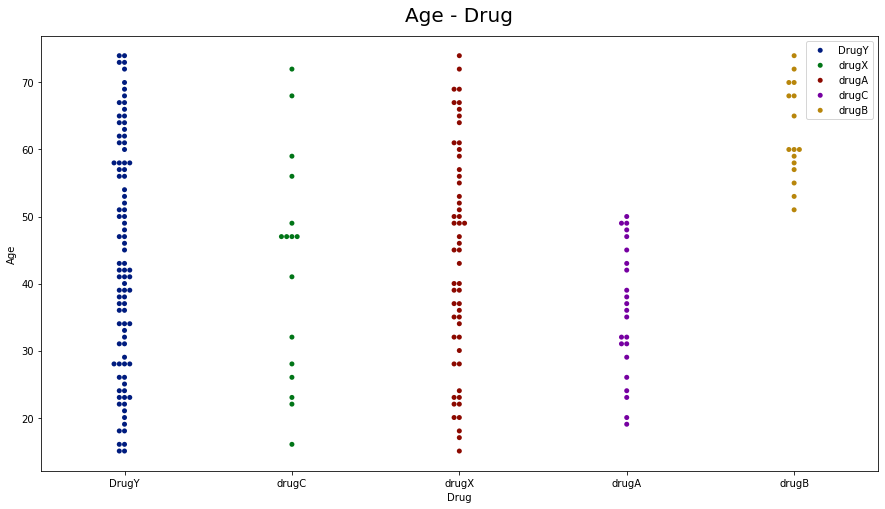

In [ ]:
plt.figure(figsize = (15,8))
sns.swarmplot(x = "Drug", y = "Age", data = data)
plt.legend(data.Drug.value_counts().index)
plt.title("Age - Drug", fontsize=20, y=1.02)
plt.show()

The data are pretty balanced, as follow from the following plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


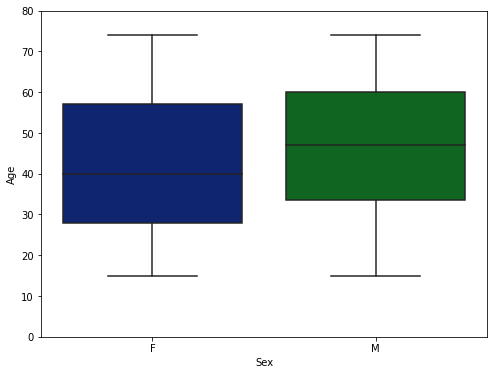

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.boxplot('Sex', 'Age', data=data).set(ylim=(0, 80))

Also looking to de level of Cholesterol we are facing a totally different consume of drugs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


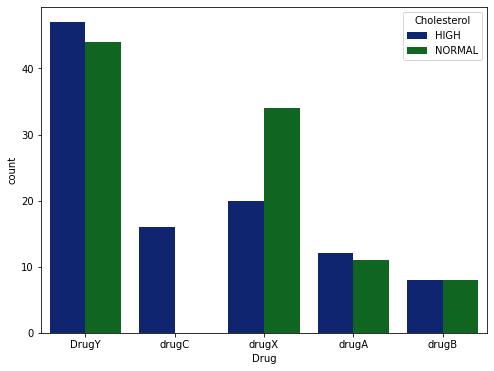

In [ ]:
plt.figure(figsize=(8,6))
chcount = sns.countplot('Drug', hue='Cholesterol', data=data)

## Split and Tensor conversion

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Convertion in a numeric version to allow the Tensor change.




In [ ]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) #we have perdofmed a one hot on categorical data
encoder = OneHotEncoder() #output as one hot encoder
encoded_Y = encoder.fit(y.reshape(-1,1))
y = encoded_Y.transform(y.reshape(-1,1)).toarray()

Split in train and test our numeric data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's scale all the variables to have the same variance arround.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Since we are intrested to work with tensors.

In [ ]:
X_train=tf.convert_to_tensor(X_train)
X_test=tf.convert_to_tensor(X_test)
y_train=tf.convert_to_tensor(y_train)
y_test=tf.convert_to_tensor(y_test)

## Tensor Flow Approach

In [ ]:
#Architecture 
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12,activation="relu"))
model.add(tf.keras.layers.Dense(12,activation="relu"))
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

#Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Fit 
history=model.fit(X_train, y_train, batch_size=32, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 1.7078 - accuracy: 0.1063
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 1.6681 - accuracy: 0.1063
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 1.6298 - accuracy: 0.1312
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 1.5982 - accuracy: 0.1375
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 1.5638 - accuracy: 0.1437
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 1.5338 - accuracy: 0.1688
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 1.5057 - accuracy: 0.1875
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 1.4781 - accuracy: 0.2188
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 1.4530 - accuracy: 0.2625
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 1.4252 - accuracy: 0.2812
Epoch 11/150
5/5 [===========

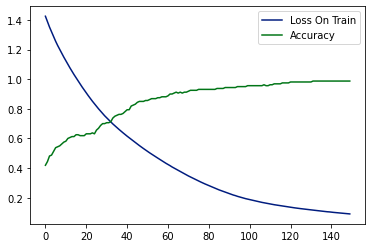

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["Loss On Train","Accuracy"])
plt.show()

In [ ]:
model.evaluate(X_test,  y_test)


2/2 [==============================] - 0s 7ms/step - loss: 0.2114 - accuracy: 0.9500


[0.21138250827789307, 0.949999988079071]

2/2 [==============================] - 0s 4ms/step


Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

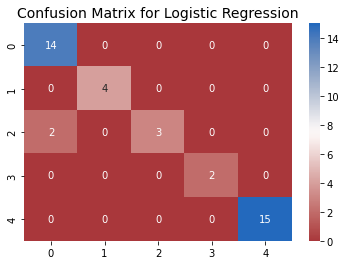

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_test=tf.argmax(y_test, axis=1)
y_pred=tf.argmax(model.predict(X_test),axis=1)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03)

In [ ]:
from sklearn.model_selection import KFold
num_splits=5
kfold=KFold(5)
train_accs, test_accs = [], []
for train_index, test_index in kfold.split(X):    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_train=tf.convert_to_tensor(X_train)
    X_test=tf.convert_to_tensor(X_test)
    y_train=tf.convert_to_tensor(y_train)
    y_test=tf.convert_to_tensor(y_test)
    tf.keras.backend.clear_session()
    model.fit(X_train, y_train, batch_size=32, epochs=150)
    y_test=tf.argmax(y_test, axis=1)
    y_pred=tf.argmax(model.predict(X_test),axis=1)
    y_train=tf.argmax(y_train,axis=1)
    train_accs.append(accuracy_score(y_train,y_train) * 100)
    test_accs.append(accuracy_score(y_test,y_pred) * 100)

print("\tTraining \t Test")
for i in range(1, num_splits+1):
  print(i, "\t", train_accs[i-1], "\t", test_accs[i-1])


## Logistic Regression

Before to compare the results in term of accuracy of a neural network with 2 dense layers with the one obtained with a logistic regression we should compute again the vector of output that in this case migth be not a one hot encoding, but a categorical one.

In [ ]:
#y_test=tf.argmax(y_test, axis=1)
y_train=tf.argmax(y_train, axis=1)
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
accuracy_score(LRclassifier.predict(X_test),y_test)


0.95

Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

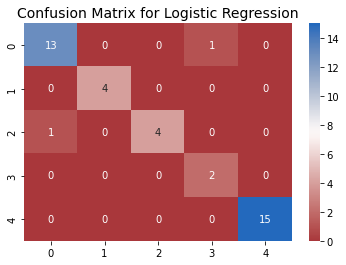

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = LRclassifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03)

In [ ]:
from sklearn.model_selection import KFold
num_splits=5
kfold=KFold(5)
train_accs, test_accs = [], []
for train_index, test_index in kfold.split(X):    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train=tf.argmax(y_train, axis=1)
    y_test=tf.argmax(y_test, axis=1)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
    LRclassifier.fit(X_train,y_train)
    y_pred=LRclassifier.predict(X_test)
    train_accs.append(accuracy_score(y_train,y_train) * 100)
    test_accs.append(accuracy_score(y_test,y_pred) * 100)

print("\tTraining \t Test")
for i in range(1, num_splits+1):
  print(i, "\t", train_accs[i-1], "\t", test_accs[i-1])


	Training 	 Test
1 	 100.0 	 92.5
2 	 100.0 	 97.5
3 	 100.0 	 95.0
4 	 100.0 	 92.5
5 	 100.0 	 97.5


Given the summary results generated with the cross validation male sense to apply a Neural Network also in this context.